In [2]:
import pandas as pd


In [3]:
print(data.head())

   CRI_YM  MRC_ADR  GENDER AGE_GR   JOB_GR CATEGORY_L_NM CATEGORY_M_NM  \
0  202201  경상남도창원시       1      C   02.회사원            생활            가례   
1  202201   충청남도남부       2      E    05.기타            생활            가례   
2  202201  울산광역시남구       2      E  04.자영업자            생활            가례   
3  202201  대구광역시기타       2      C    05.기타            생활            가례   
4  202201  울산광역시남구       2      B  04.자영업자            생활            가례   

  MAIN_CSM_AREA  SUM_CNT    SUM_AMT  
0        경상북도남부      3.0  6106000.0  
1        충청남도남부      3.0   115000.0  
2       울산광역시남구      3.0    99000.0  
3       인천광역시기타      3.0    43000.0  
4       인천광역시기타      3.0  1365000.0  


In [4]:
# Extract 10% of the data
sampled_data = data.sample(frac=0.01, random_state=1)
print(sampled_data.head())

          CRI_YM  MRC_ADR  GENDER AGE_GR   JOB_GR CATEGORY_L_NM CATEGORY_M_NM  \
5474523   202208  부산광역시서부       1      G   02.회사원            건강            병원   
5657339   202209  충청북도충주시       2      E   02.회사원           자동차            주유   
6115296   202209  대구광역시동구       1      C   02.회사원            쇼핑           편의점   
10592330  202304  대전광역시서구       2      E    05.기타            쇼핑            의류   
3898318   202206   경상남도서부       2      C  04.자영업자            생활          인테리어   

         MAIN_CSM_AREA  SUM_CNT    SUM_AMT  
5474523       서울특별시송파구      3.0    15000.0  
5657339        경상남도창원시      3.0  1217000.0  
6115296         충청남도북부     15.0    99000.0  
10592330        충청남도남부     26.0   836000.0  
3898318        부산광역시동부      3.0    52000.0  


In [5]:
sampled_data.to_csv('sampled_data.csv', index=False)

In [6]:
filtered_data = data[(data['MRC_ADR'].str.contains('부산')) & (~data['MAIN_CSM_AREA'].str.contains('부산'))]
print(filtered_data.head())

    CRI_YM   MRC_ADR  GENDER AGE_GR  JOB_GR CATEGORY_L_NM CATEGORY_M_NM  \
21  202201   부산광역시서부       2      C   05.기타            쇼핑            가전   
30  202201  부산광역시사하구       2      E  02.회사원            쇼핑            가전   
44  202201   부산광역시동부       1      E   05.기타            쇼핑            가전   
48  202201   부산광역시동부       1      D  02.회사원            쇼핑            가전   
66  202201   부산광역시동부       2      D   05.기타            쇼핑            가전   

   MAIN_CSM_AREA  SUM_CNT    SUM_AMT  
21       경상남도창원시      3.0  5646000.0  
30       서울특별시남부      3.0   511000.0  
44      서울특별시양천구      3.0     8000.0  
48   제주특별자치도서귀포시      3.0    29000.0  
66       경상남도김해시      5.0   921000.0  


In [7]:
print(len(filtered_data))

1623414


In [8]:
filtered_data.to_csv('filtered_data.csv', index=False)

In [9]:
# Convert CRI_YM to datetime format
filtered_data['CRI_YM'] = pd.to_datetime(filtered_data['CRI_YM'], format='%Y%m')

# Set CRI_YM as the index
filtered_data.set_index('CRI_YM', inplace=True)

print(filtered_data.head())

             MRC_ADR  GENDER AGE_GR  JOB_GR CATEGORY_L_NM CATEGORY_M_NM  \
CRI_YM                                                                    
2022-01-01   부산광역시서부       2      C   05.기타            쇼핑            가전   
2022-01-01  부산광역시사하구       2      E  02.회사원            쇼핑            가전   
2022-01-01   부산광역시동부       1      E   05.기타            쇼핑            가전   
2022-01-01   부산광역시동부       1      D  02.회사원            쇼핑            가전   
2022-01-01   부산광역시동부       2      D   05.기타            쇼핑            가전   

           MAIN_CSM_AREA  SUM_CNT    SUM_AMT  
CRI_YM                                        
2022-01-01       경상남도창원시      3.0  5646000.0  
2022-01-01       서울특별시남부      3.0   511000.0  
2022-01-01      서울특별시양천구      3.0     8000.0  
2022-01-01   제주특별자치도서귀포시      3.0    29000.0  
2022-01-01       경상남도김해시      5.0   921000.0  


/var/folders/n9/l8f6mpzd2yg70fqphplgvm_00000gn/T/ipykernel_25524/1734568064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['CRI_YM'] = pd.to_datetime(filtered_data['CRI_YM'], format='%Y%m')


In [10]:
import matplotlib.pyplot as plt

# Group by CRI_YM and CATEGORY_M_NM, then sum the SUM_AMT
time_series_data = filtered_data.groupby(['CRI_YM', 'CATEGORY_M_NM'])['SUM_AMT'].sum().unstack()

<Axes: xlabel='CRI_YM'>

/Users/wonjds/Library/Python/3.12/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/wonjds/Library/Python/3.12/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47168 (\N{HANGUL SYLLABLE RYE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/wonjds/Library/Python/3.12/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/wonjds/Library/Python/3.12/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/wonjds/Library/Python/3.12/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/wonjds/Library/P

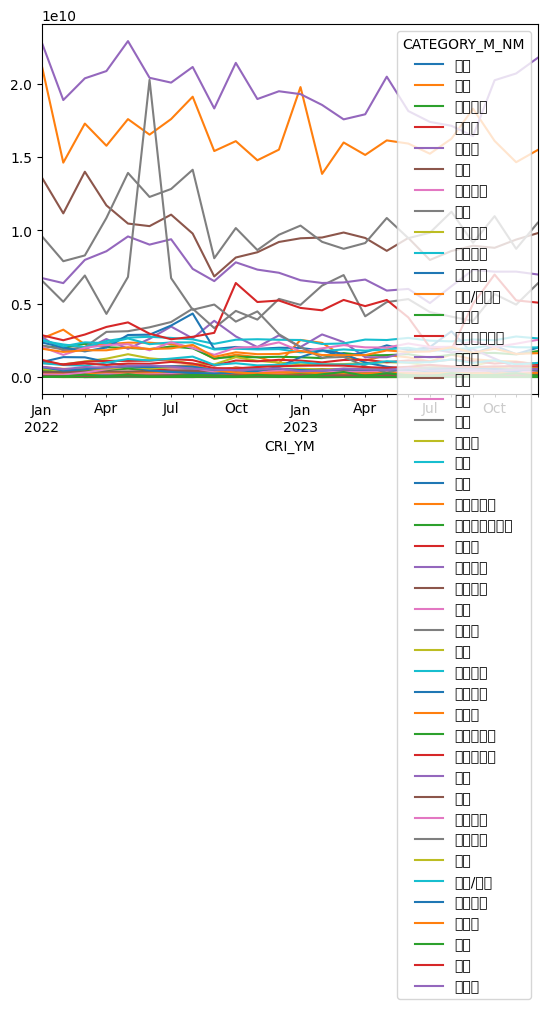

In [11]:
time_series_data.plot()

In [13]:
# Remove rows with NaN values
time_series_data = time_series_data.dropna()


/Users/wonjds/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/wonjds/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/wonjds/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/wonjds/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/wonjds/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50500 (\N{HANGUL 

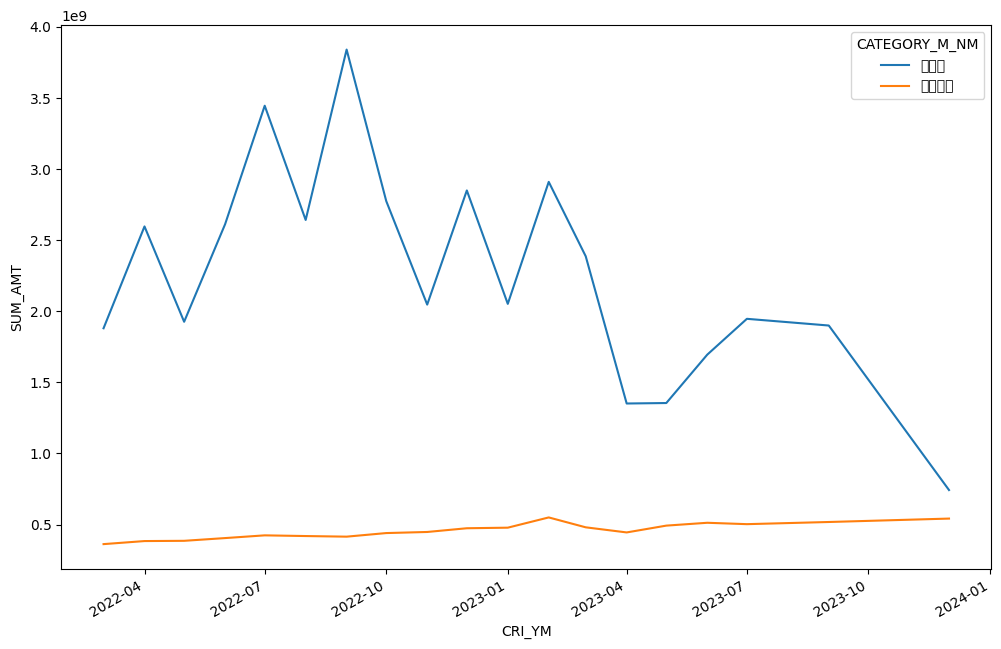

In [17]:
# Plot the time series data for the top 5 categories with the largest slopes
time_series_data[['공과금', '유아교육']].plot(figsize=(12, 8))
plt.xlabel('CRI_YM')
plt.ylabel('SUM_AMT')
plt.legend(title='CATEGORY_M_NM')
plt.show()

In [18]:
# Filter rows where both MRC_ADR and MAIN_CSM_AREA contain the word '부산'
filtered_data_busan = data[data['MRC_ADR'].str.contains('부산') & data['MAIN_CSM_AREA'].str.contains('부산')]
print(filtered_data_busan.head())

     CRI_YM   MRC_ADR  GENDER AGE_GR   JOB_GR CATEGORY_L_NM CATEGORY_M_NM  \
28   202201  부산광역시사하구       2      F    05.기타            쇼핑            가전   
71   202201   부산광역시동부       1      F    05.기타            쇼핑            가전   
79   202201  부산광역시사하구       2      E  04.자영업자            쇼핑            가전   
82   202201   부산광역시동부       1      D    05.기타            쇼핑            가전   
105  202201   부산광역시동부       2      B   02.회사원            쇼핑            가전   

    MAIN_CSM_AREA  SUM_CNT     SUM_AMT  
28        부산광역시동부      3.0  10119000.0  
71        부산광역시서부      5.0   4586000.0  
79      부산광역시해운대구      5.0   9947000.0  
82        부산광역시서부      6.0    208000.0  
105     부산광역시부산진구      8.0   8787000.0  
